# Data Exploration

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the CSV into a DataFrame
synergy_l_data = pd.read_csv("synergy_logistics_database.csv")

In [3]:
# A little preview of the data
synergy_l_data.head()

,register_id,direction,origin,destination,year,date,product,transport_mode,company_name,total_value
0,1,Exports,Japan,China,2015,31/01/15,Cars,Sea,Honda,33000000
1,2,Exports,Japan,China,2015,01/02/15,Cars,Sea,Honda,16000000
2,3,Exports,Japan,China,2015,02/02/15,Cars,Sea,Honda,29000000
3,4,Exports,Japan,China,2015,03/02/15,Cars,Sea,Honda,14000000
4,5,Exports,Japan,China,2015,04/02/15,Cars,Sea,Honda,17000000


In [4]:
# Get some info from the DataFrame
synergy_l_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19056 entries, 0 to 19055
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   register_id     19056 non-null  int64 
 1   direction       19056 non-null  object
 2   origin          19056 non-null  object
 3   destination     19056 non-null  object
 4   year            19056 non-null  int64 
 5   date            19056 non-null  object
 6   product         19056 non-null  object
 7   transport_mode  19056 non-null  object
 8   company_name    19056 non-null  object
 9   total_value     19056 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 1.5+ MB


In [5]:
# Just to make sure all of the data is complete
pd.isnull(synergy_l_data).any()

register_id       False
direction         False
origin            False
destination       False
year              False
date              False
product           False
transport_mode    False
company_name      False
total_value       False
dtype: bool

# Option 1 - Top Routes

In [6]:
# Get all the unique routes and the frequency of each one
# temp = synergy_l_data[['origin','destination']].drop_duplicates()
# unique_routes = synergy_l_data.pivot_table(columns=['origin','destination'], aggfunc='size')
# sorted_routes = unique_routes.sort_values(ascending=False)
# sorted_routes

unique_routes = synergy_l_data[['origin','destination']].drop_duplicates()
revenue_per_route = {'total_revenue': [], 'frequency': [], 'avrg_value_per_travel': []}
for origin, destination in unique_routes.values:
    df_of_routes = synergy_l_data[(synergy_l_data['origin'] == origin) &  (synergy_l_data['destination'] == destination)]
    total_value = df_of_routes['total_value'].sum()
    frequency = df_of_routes.shape[0]
    revenue_per_route['total_revenue'].append(total_value)
    revenue_per_route['frequency'].append(frequency)
    revenue_per_route['avrg_value_per_travel'].append(total_value / frequency)

In [7]:
unique_routes['total_revenue'] = revenue_per_route['total_revenue']
unique_routes['frequency'] = revenue_per_route['frequency']
unique_routes['avrg_value_per_travel'] = revenue_per_route['avrg_value_per_travel']

In [8]:
sorted_routes = unique_routes.sort_values(by='frequency', ascending=False)
sorted_routes.head()

,origin,destination,total_revenue,frequency,avrg_value_per_travel
4211,South Korea,Vietnam,6877007000,497,1.383704e+07
5270,Netherlands,Belgium,3238142000,437,7.409936e+06
4874,USA,Netherlands,1032187000,436,2.367401e+06
3126,Japan,Mexico,5829000000,385,1.514026e+07
618,China,Mexico,12494000000,351,3.559544e+07


In [9]:
# Prepare the top 10 routes, 10 more and the average after the top 10
total_deliveries = synergy_l_data.shape[0]
tmp_top_routes = {'route': [], 'count': []}
total = 0
# For all sorted routes group the top 20 and calculate the average
for index, (origin, destination, _, count, _) in enumerate(sorted_routes.values):
    if index < 20:
        tmp_top_routes['route'].append(f'{origin} - {destination}')
        tmp_top_routes['count'].append(count)
    if index > 10:
        total += count
tmp_top_routes['route'].append('Average after the top 10')
tmp_top_routes['count'].append(total/len(sorted_routes))

In [10]:
# Create the top_routes DataFrame
top_routes = pd.DataFrame(tmp_top_routes,columns=['route','count'])
top_routes.tail()

,route,count
16,Netherlands - France,239.000000
17,Germany - USA,236.000000
18,Germany - Mexico,231.000000
19,United Kingdom - Belgium,229.000000
20,Average after the top 10,87.831395


# Análisis
Dentro del top 10 de rutas se pueden observar nombres en común, como China, Japón y México e incluso Países Bajos junto con Corea del Sur.  Implementar un enfoque en el top 10 de rutas (tomando en consideración el rendimiento de las siguientes rutas) puede ser una buena opción para el negocio.

Es importante seguir revisando el comportamiento de las entregas, para revisar si se mantiene está la frecuencia con el tiempo, además de hacer un análisis del valor de ganancia promedio por cada una de estas rutas únicas, como se ve a continuación:

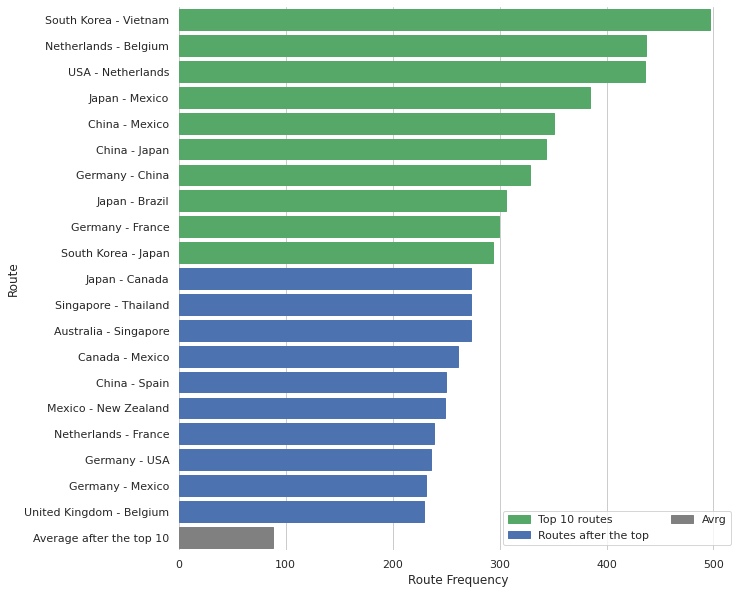

In [28]:
# Plot the top 10 countries followed by the nex 10 and the average
sns.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(10, 10))

sns.barplot(y="route", x="count", data=top_routes)

top = 10
for index, bar in enumerate(ax.patches):
    if index == 0:
        bar.set_label(f'Top {top} routes')
    if index == top:
        bar.set_label(f'Routes after the top')

    if index < top:
        bar.set_color('g')
    elif index == len(ax.patches) - 1:
        bar.set_color('gray')
        bar.set_label(f'Avrg')
    else:
        bar.set_color('b')

ax.set(ylabel="Route", xlabel="Route Frequency")
ax.legend(ncol=2, loc="lower right", frameon=True)
sns.despine(left=True, bottom=True)

In [24]:
unique_routes.sort_values(by='avrg_value_per_travel', ascending=False).head(10).style.format({
    'avrg_value_per_travel': '{:,.2f}k'
}).hide_index()

origin,destination,total_revenue,frequency,avrg_value_per_travel
France,Italy,852000000,23,"37,043,478.26k"
France,United Kingdom,5427000000,147,"36,918,367.35k"
China,Mexico,12494000000,351,"35,595,441.60k"
Germany,Italy,4541000000,130,"34,930,769.23k"
South Korea,United Arab Emirates,1713000000,51,"33,588,235.29k"
France,USA,3402000000,103,"33,029,126.21k"
China,USA,4094000000,126,"32,492,063.49k"
Canada,Mexico,8450000000,261,"32,375,478.93k"
Vietnam,United Arab Emirates,540000000,18,"30,000,000.00k"
Japan,United Arab Emirates,2238000000,76,"29,447,368.42k"


Es importante denotar que no necesariamente una frecuencia más grande equivale a una mayor retribución monetaria, ya que con solo 23 viajes de Francia a Italia tenemos el mayor promedio de ganancia por viaje, por lo que podemos intentar apostar por rutas que presenten un mayor promedio y se encuentren en un punto medio.

# Option 2 - Transport Performance

In [12]:
transport_revenue = synergy_l_data.groupby(by=['transport_mode']).sum()['total_value'].sort_values(ascending=False)
transport_revenue.apply((lambda x: '${:,.2f}k'.format(x/1000))).to_frame().T

transport_mode,Sea,Rail,Air,Road
total_value,"$100,530,622.00k","$43,628,043.00k","$38,262,147.00k","$33,270,486.00k"


# Análisis
El medio de transporte que genera la mayor cantidad de ganancias para  Synergy Logistics es por mar, seguido por tren, aire y al final por carretera, el medio de transporte que podrían reducir es por carretera. Cabe recalcar que aunque sea el medio de transporte que menos ingresos genera no está tan alejado del tercero que es por aire, por lo que apostar a un crecimiento a la par de los 3 últimos medios puede llegar a ser una alternativa a considerar.

Text(0.5, 1.0, 'Total Revenue % per Transport Mode')

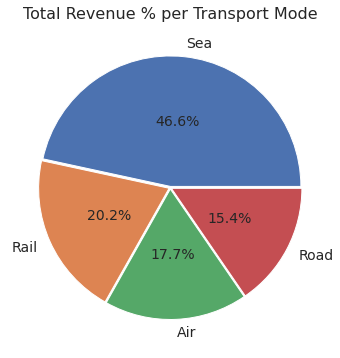

In [13]:
fig, ax = plt.subplots(figsize=[10,6])
labels = transport_revenue.keys()
plt.rcParams.update({'font.size': 14})
plt.pie(x=transport_revenue, autopct="%.1f%%", explode=[0.01]*4, labels=labels, pctdistance=0.5, textprops={'fontsize': 14})
plt.title("Total Revenue % per Transport Mode", fontsize=16)

# Option 3 - Revenue from Imports and Exports

In [14]:
imports_df = synergy_l_data[synergy_l_data['direction'] == 'Imports']
exports_df = synergy_l_data[synergy_l_data['direction'] == 'Exports']
total_import_revenue = imports_df['total_value'].sum()
total_export_revenue = exports_df['total_value'].sum()
print(f'Import Revenue: {total_import_revenue}, Export Revenue: {total_export_revenue}')

Import Revenue: 55528000000, Export Revenue: 160163298000


In [15]:
origin_revenue = imports_df.groupby(by=['origin']).sum()['total_value'].sort_values(ascending=False)
origin_revenue.apply((lambda x: '${:,.2f}k'.format(x/1000))).to_frame().head()

,total_value
origin,
China,"$12,233,000.00k"
Japan,"$8,094,000.00k"
USA,"$5,291,000.00k"
Mexico,"$4,621,000.00k"
Germany,"$4,250,000.00k"


In [16]:
revenue_sum = 0
max_total = total_import_revenue * .8
import_destinations = []
for destination, val in origin_revenue.items():
    revenue_sum += val
    if revenue_sum >= max_total:
        break
    import_destinations.append(destination)

In [17]:
destiny_revenue = exports_df.groupby(by=['destination']).sum()['total_value'].sort_values(ascending=False)
destiny_revenue.apply((lambda x: '${:,.2f}k'.format(x/1000))).to_frame().head()

,total_value
destination,
Mexico,"$28,315,015.00k"
USA,"$13,159,409.00k"
Belgium,"$13,099,380.00k"
Germany,"$11,303,451.00k"
China,"$11,259,992.00k"


In [18]:
revenue_sum = 0
max_total = total_export_revenue * .8
export_destinations = []
for destination, val in destiny_revenue.items():
    revenue_sum += val
    if revenue_sum >= max_total:
        break
    export_destinations.append(destination)

In [19]:
print(import_destinations, export_destinations)

['China', 'Japan', 'USA', 'Mexico', 'Germany', 'Singapore', 'South Korea'] ['Mexico', 'USA', 'Belgium', 'Germany', 'China', 'Japan', 'United Kingdom', 'Brazil', 'South Korea', 'Vietnam', 'Italy', 'Spain']


In [20]:
origin_revenue = origin_revenue.to_frame()
origin_revenue["percentage"] = origin_revenue.cumsum() / total_import_revenue * 100

In [22]:
destiny_revenue = destiny_revenue.to_frame()
destiny_revenue["percentage"] = destiny_revenue.cumsum() / total_export_revenue * 100

# Análisis
A continuación se muestran las últimas dos gráficas que contienen los países dentro y fuera del 80% de ganancias para la empresa separado en importaciones y exportaciones los cuales pueden ser el punto en donde enfocarán sus próximos esfuerzos.

/tmp/ipykernel_2608/25816420.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(destiny_revenue.index, rotation = 65)


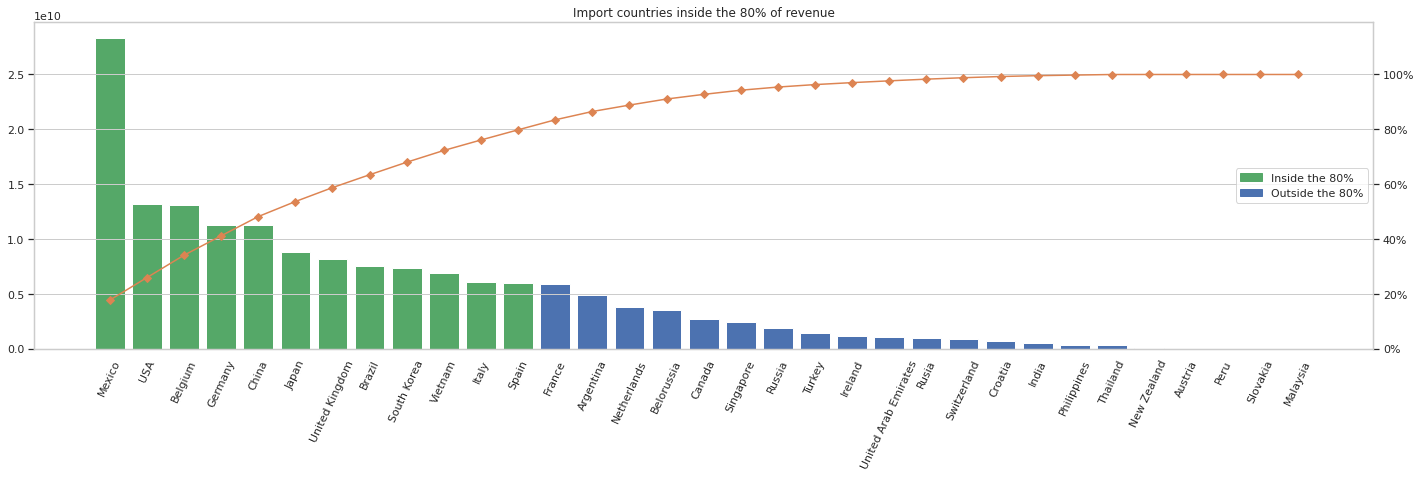

In [26]:
fig, ax1 = plt.subplots(figsize=(24, 6))

colors = []
for origin in destiny_revenue.index:
    if origin in export_destinations:
        colors.append('g')
    else:
        colors.append('b')
ax1.bar(destiny_revenue.index, destiny_revenue["total_value"], color=colors)
ax1.grid(False)
ax2 = ax1.twinx()
ax2.grid(True)
ax2.plot(destiny_revenue.index, destiny_revenue["percentage"], color="C1", marker="D")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim(bottom=0, top=119)

ax1.set_title(f"Import countries inside the 80% of revenue")
ax1.set_xticklabels(destiny_revenue.index, rotation = 65)

colors = {'Inside the 80%':'g', 'Outside the 80%':'b'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax2.legend(handles, labels, loc='center right')

plt.show()

/tmp/ipykernel_2608/3539399507.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(origin_revenue.index, rotation = 55)


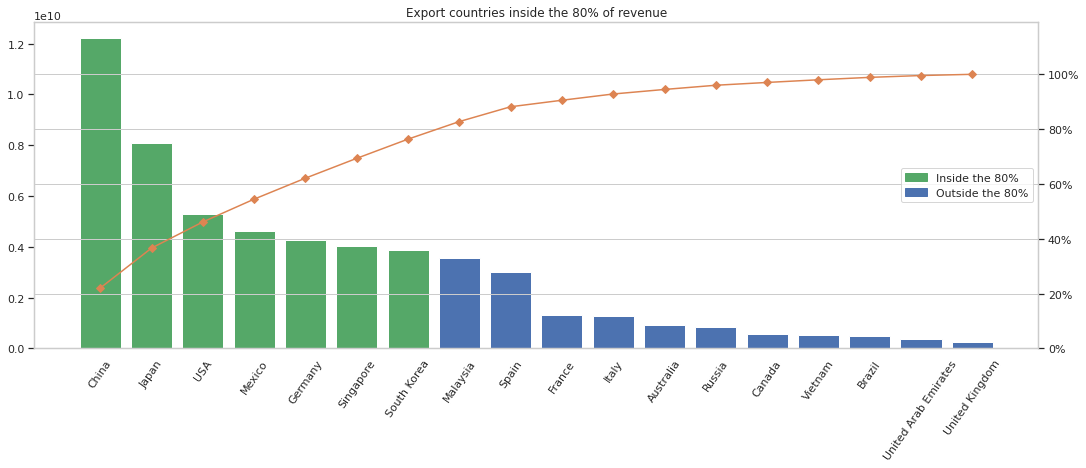

In [27]:
fig, ax1 = plt.subplots(figsize=(18, 6))

colors = []
for origin in origin_revenue.index:
    if origin in import_destinations:
        colors.append('g')
    else:
        colors.append('b')
ax1.bar(origin_revenue.index, origin_revenue["total_value"], color=colors)
ax1.grid(False)
ax2 = ax1.twinx()
ax2.grid(True)
ax2.plot(origin_revenue.index, origin_revenue["percentage"], color="C1", marker="D")
ax2.yaxis.set_major_formatter(PercentFormatter())
ax2.set_ylim(bottom=0, top=119)

ax1.set_title(f"Export countries inside the 80% of revenue")
ax1.set_xticklabels(origin_revenue.index, rotation = 55)

colors = {'Inside the 80%':'g', 'Outside the 80%':'b'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
ax2.legend(handles, labels, loc='center right')

plt.show()

# Estrategia final
Como estrategia final lo principal sería reducir los esfuerzos en el transporte por carretera y en cuanto a países considerar que se debe de hacer contra los países que generan la menor cantidad de ingresos junto con menos entregas, apostando también por una mayor cantidad de esfuerzos hacia China y México por ejemplo, seguido de países como Japón, EE. UU., Bélgica y Alemania